In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import glob

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
import cv2
import os

In [4]:
image_files = glob.glob('train/*')

In [5]:
image_files

['train\\apple_1.png',
 'train\\apple_2.png',
 'train\\apple_3.png',
 'train\\apple_4.png',
 'train\\apple_5.png',
 'train\\apple_6.png',
 'train\\apple_7.jpg',
 'train\\apple_8.jpg']

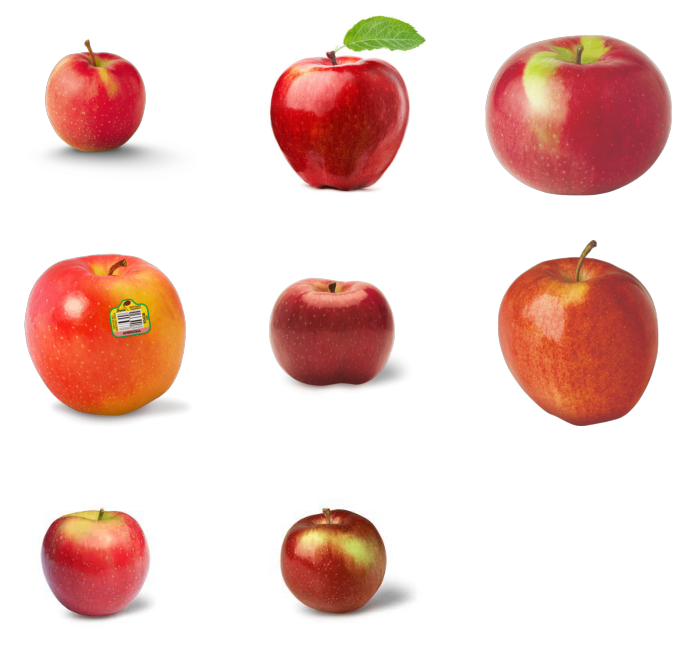

In [6]:
COLUMNS=3
ROWS=3

fig = plt.gcf()
fig.set_size_inches(ROWS*4,COLUMNS*4)
i=0

for file in image_files:
    sp = plt.subplot(ROWS, COLUMNS, i+1)
    sp.axis('Off')
    
    img = mpimg.imread(file)
    plt.imshow(img)
    i+=1

plt.show()

In [7]:
import os

In [9]:
os.mkdir('Resized_images')
os.mkdir('Resized_images/apple')
os.mkdir('Resized_images/others')

In [10]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [11]:
from PIL import Image

In [12]:
with Image.open('train/apple_3.png') as im:
    print(im.mode)
    im.show()
    

RGBA


In [13]:
for file in image_files:
    with Image.open(file) as im:
        im.resize((300,300))
        img = im.convert("RGB")
        filename = file.split('\\')[1] 
        path = os.path.join('Resized_images/apple',filename)
        img.save(path)

C:\Users\parih\anaconda3\lib\site-packages\PIL\Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [14]:
resize_files = glob.glob('Resized_images/apple/*')
df_apple_class = pd.DataFrame({'Filename':resize_files})
df_apple_class

,Filename
0,Resized_images/apple\apple_1.png
1,Resized_images/apple\apple_2.png
2,Resized_images/apple\apple_3.png
3,Resized_images/apple\apple_4.png
4,Resized_images/apple\apple_5.png
5,Resized_images/apple\apple_6.png
6,Resized_images/apple\apple_7.jpg
7,Resized_images/apple\apple_8.jpg


In [15]:
df_apple_class['label'] = df_apple_class['Filename'].apply(lambda x: 'apple' if x.find('apple') else 'other')

In [16]:
df_apple_class

,Filename,label
0,Resized_images/apple\apple_1.png,apple
1,Resized_images/apple\apple_2.png,apple
2,Resized_images/apple\apple_3.png,apple
3,Resized_images/apple\apple_4.png,apple
4,Resized_images/apple\apple_5.png,apple
5,Resized_images/apple\apple_6.png,apple
6,Resized_images/apple\apple_7.jpg,apple
7,Resized_images/apple\apple_8.jpg,apple


In [17]:
from tensorflow import keras

In [18]:
model = keras.models.Sequential([
                                 keras.layers.Conv2D(16, (3,3), activation='relu', input_shape = (300,300,3)),
                                 keras.layers.MaxPool2D((2,2)),
                                 
                                 keras.layers.Conv2D(32 , (3,3), activation='relu'),
                                 keras.layers.MaxPool2D((2,2)),

                                 keras.layers.Conv2D(64,(3,3), activation='relu'),
                                 keras.layers.MaxPool2D(2,2),

                                 keras.layers.Conv2D(64,(3,3), activation='relu'),
                                 keras.layers.MaxPool2D(2,2),

                                 keras.layers.Conv2D(64,(3,3), activation='relu'),
                                 keras.layers.MaxPool2D(2,2),

                                 keras.layers.Flatten(),
                                 keras.layers.Dense(512, activation = 'relu'),
                                 keras.layers.Dense(1,activation='sigmoid')

])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [20]:
model.compile(optimizer = keras.optimizers.RMSprop(lr = 0.001),
              loss = keras.losses.binary_crossentropy,
              metrics = ['accuracy'])

C:\Users\parih\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    'Resized_images/',
    target_size = (300,300),
    class_mode = 'binary')

Found 8 images belonging to 2 classes.


In [22]:
history = model.fit_generator(
    train_generator,
    epochs = 5,
    verbose = 1
)

C:\Users\parih\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 0.6874 - accuracy: 0.7500
Epoch 2/5
1/1 [==============================] - 0s 450ms/step - loss: 8.9874e-05 - accuracy: 1.0000
Epoch 3/5
1/1 [==============================] - 0s 479ms/step - loss: 4.4327e-06 - accuracy: 1.0000
Epoch 4/5
1/1 [==============================] - 0s 488ms/step - loss: 3.1125e-06 - accuracy: 1.0000
Epoch 5/5
1/1 [==============================] - 1s 524ms/step - loss: 2.2912e-06 - accuracy: 1.0000


In [23]:
os.mkdir('test')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'test'

In [24]:
from keras.preprocessing import image

In [25]:
with Image.open('test/firefox_2018-07-10_07-50-11.png') as im:
    img = im.convert("RGB")
    img.save('test/firefox_2018-07-10_07-50-11.png')

In [26]:
img = image.load_img('test/firefox_2018-07-10_07-50-11.png', target_size = (300,300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
image = np.vstack([x])

classes = model.predict(image)
if classes[0] < 0.5:
    print('firefox_2018-07-10_07-50-11.png is an apple')
else:
    print('firefox_2018-07-10_07-50-11.png is not an apple')

firefox_2018-07-10_07-50-11.png is an apple


In [27]:
model.save('model.h5')